<a href="https://colab.research.google.com/github/Anthomn/Proyecto-universitario---Data-Analitycs/blob/main/Proyecto_universitario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.- Pre-Procesamiento de los datos

In [ ]:
# Importar paquetes

import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
%matplotlib inline

#Automcompletar rápido
%config IPCompleter.greedy=True
#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#GoogleDrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2.1- Etapa de carga de datos
En esta etapa realizaremos la carga de datos correspondientes, utilizando las herramientas de Google Drive para el uso de los datasets.


In [ ]:
#Carga desde un archivo pickle para reducir la espera
#df_consumohdna = pd.read_pickle('/content/drive/MyDrive/TP-BUSINESS/df_combine.pickle')

In [ ]:
#Cargamos los archivos csv en DataFrames

df_consumohdna_202309 = pd.read_csv("/content/drive/MyDrive/TP-BUSINESS/consumohdna_202309.csv", delimiter=";")

df_consumohdna_202310 = pd.read_csv("/content/drive/MyDrive/TP-BUSINESS/consumohdna_202310.csv", delimiter=";")

df_consumohdna_202311 = pd.read_csv("/content/drive/MyDrive/TP-BUSINESS/consumohdna_202311.csv", delimiter=";")

df_consumohdna_202312 = pd.read_csv("/content/drive/MyDrive/TP-BUSINESS/consumohdna_202312.csv", delimiter=";")

df_consumohdna_202401 = pd.read_csv("/content/drive/MyDrive/TP-BUSINESS/consumohdna_202401.csv", delimiter=";")

df_consumohdna_202402 = pd.read_csv("/content/drive/MyDrive/TP-BUSINESS/consumohdna_202402.csv", delimiter=";")

#NOTA: Cambiar la ruta según la PC del usuario

## 2.1- Etapa de combinación de datos
En esta etapa combinaremos los DataFrames en uno solo con el propósito de facilitar la limpieza de datos y realizar un análisis preciso.

In [ ]:
# Combinamos todos los DataFrames en uno solo
df_consumohdna = pd.concat([df_consumohdna_202309, df_consumohdna_202310,
                            df_consumohdna_202311, df_consumohdna_202312,
                            df_consumohdna_202401, df_consumohdna_202402])

df_consumohdna.head()

,FECHA_CORTE,NRO_SERVICIO,NOMBRE_SERVICIO,DIRECCION,ID_TIPO_IDENTIDAD,NRO_IDENTIDAD,ID_EMPRESA,NOMBRE_EMPRESA,ID_UUNN,UNIDAD_NEGOCIO,...,UBIGEO,ID_TIPO_DOC_FAC,NRO_DOC_FAC,CARTERA,FECHA_VENCIMIENTO,FECHA_EMISION,FECHA_COSNUMO_DESDE,FECHA_CONSUMO_HASTA,IMPORTE,CONSUMO
0,202309,0,LXXXXXXXXXXXXXo,JXXXXXXXXXXXXX,1,XXXXXXXX,3,Hidrandina S.A.,51,La Libertad,...,130101,7,S501-63469065,C,20231021,20231001,20230828,20230926,104.40,111.00
1,202309,0,CXXXXXXXXXXXXXy,JXXXXXXXXXXXXX,1,XXXXXXXX,3,Hidrandina S.A.,51,La Libertad,...,130101,7,S501-63469068,C,20231021,20231001,20230828,20230926,391.00,167.00
2,202309,0,CXXXXXXXXXXXXXo,JXXXXXXXXXXXXX,1,XXXXXXXX,3,Hidrandina S.A.,51,La Libertad,...,130101,7,S501-63469075,C,20231021,20231001,20230828,20230926,18.90,1.00
3,202309,0,HXXXXXXXXXXXXXr,JXXXXXXXXXXXXXo,1,XXXXXXXX,3,Hidrandina S.A.,51,La Libertad,...,130101,7,S501-63469087,C,20231021,20231001,20230828,20230926,165.50,157.00
4,202309,0,CXXXXXXXXXXXXXo,JXXXXXXXXXXXXX,1,XXXXXXXX,3,Hidrandina S.A.,51,La Libertad,...,130101,7,S501-63469095,C,20231021,20231001,20230828,20230926,321.00,321.00


## 2.2- Etapa de calidad y limpieza de datos
En esta etapa, nos enfocamos en mejorar la integridad de los datos mediante la detección y corrección de errores, eliminación de duplicados y estandarización de formatos, garantizando así su precisión y fiabilidad para el análisis.

### 2.2.1 Exploración inicial (Overview Data)


In [ ]:
# Revisar las primeras filas del DataFrame
df_consumohdna.head()

,FECHA_CORTE,NRO_SERVICIO,NOMBRE_SERVICIO,DIRECCION,ID_TIPO_IDENTIDAD,NRO_IDENTIDAD,ID_EMPRESA,NOMBRE_EMPRESA,ID_UUNN,UNIDAD_NEGOCIO,...,UBIGEO,ID_TIPO_DOC_FAC,NRO_DOC_FAC,CARTERA,FECHA_VENCIMIENTO,FECHA_EMISION,FECHA_COSNUMO_DESDE,FECHA_CONSUMO_HASTA,IMPORTE,CONSUMO
0,202309,0,LXXXXXXXXXXXXXo,JXXXXXXXXXXXXX,1,XXXXXXXX,3,Hidrandina S.A.,51,La Libertad,...,130101,7,S501-63469065,C,20231021,20231001,20230828,20230926,104.40,111.00
1,202309,0,CXXXXXXXXXXXXXy,JXXXXXXXXXXXXX,1,XXXXXXXX,3,Hidrandina S.A.,51,La Libertad,...,130101,7,S501-63469068,C,20231021,20231001,20230828,20230926,391.00,167.00
2,202309,0,CXXXXXXXXXXXXXo,JXXXXXXXXXXXXX,1,XXXXXXXX,3,Hidrandina S.A.,51,La Libertad,...,130101,7,S501-63469075,C,20231021,20231001,20230828,20230926,18.90,1.00
3,202309,0,HXXXXXXXXXXXXXr,JXXXXXXXXXXXXXo,1,XXXXXXXX,3,Hidrandina S.A.,51,La Libertad,...,130101,7,S501-63469087,C,20231021,20231001,20230828,20230926,165.50,157.00
4,202309,0,CXXXXXXXXXXXXXo,JXXXXXXXXXXXXX,1,XXXXXXXX,3,Hidrandina S.A.,51,La Libertad,...,130101,7,S501-63469095,C,20231021,20231001,20230828,20230926,321.00,321.00


In [ ]:
# Identificar el número de filas y columnas
num_filas, num_columnas = df_consumohdna.shape
print(f"Número de filas: {num_filas}, Número de columnas: {num_columnas}")

Número de filas: 5994895, Número de columnas: 25


In [ ]:
# Revisar los nombres de las columnas
print(df_consumohdna.columns)

Index(['FECHA_CORTE', 'NRO_SERVICIO', 'NOMBRE_SERVICIO', 'DIRECCION',
       'ID_TIPO_IDENTIDAD', 'NRO_IDENTIDAD', 'ID_EMPRESA', 'NOMBRE_EMPRESA',
       'ID_UUNN', 'UNIDAD_NEGOCIO', 'PERIODO', 'TARIFA', 'DEPARTAMENTO',
       'PROVINCIA', 'DISTRITO', 'UBIGEO', 'ID_TIPO_DOC_FAC', 'NRO_DOC_FAC',
       'CARTERA', 'FECHA_VENCIMIENTO', 'FECHA_EMISION', 'FECHA_COSNUMO_DESDE',
       'FECHA_CONSUMO_HASTA', 'IMPORTE', 'CONSUMO'],
      dtype='object')


In [ ]:
# Explorar los tipos de datos de cada columna
print(df_consumohdna.dtypes)

FECHA_CORTE              int64
NRO_SERVICIO             int64
NOMBRE_SERVICIO         object
DIRECCION               object
ID_TIPO_IDENTIDAD        int64
NRO_IDENTIDAD           object
ID_EMPRESA               int64
NOMBRE_EMPRESA          object
ID_UUNN                  int64
UNIDAD_NEGOCIO          object
PERIODO                  int64
TARIFA                  object
DEPARTAMENTO            object
PROVINCIA               object
DISTRITO                object
UBIGEO                   int64
ID_TIPO_DOC_FAC          int64
NRO_DOC_FAC             object
CARTERA                 object
FECHA_VENCIMIENTO        int64
FECHA_EMISION            int64
FECHA_COSNUMO_DESDE      int64
FECHA_CONSUMO_HASTA      int64
IMPORTE                float64
CONSUMO                float64
dtype: object


In [ ]:
# Identificar valores faltantes
print(df_consumohdna.isnull().sum())

FECHA_CORTE            0
NRO_SERVICIO           0
NOMBRE_SERVICIO        0
DIRECCION              0
ID_TIPO_IDENTIDAD      0
NRO_IDENTIDAD          0
ID_EMPRESA             0
NOMBRE_EMPRESA         0
ID_UUNN                0
UNIDAD_NEGOCIO         0
PERIODO                0
TARIFA                 0
DEPARTAMENTO           0
PROVINCIA              0
DISTRITO               0
UBIGEO                 0
ID_TIPO_DOC_FAC        0
NRO_DOC_FAC            0
CARTERA                0
FECHA_VENCIMIENTO      0
FECHA_EMISION          0
FECHA_COSNUMO_DESDE    0
FECHA_CONSUMO_HASTA    0
IMPORTE                0
CONSUMO                0
dtype: int64


In [ ]:
# Eliminar columnas que no brindan data
cols = ['ID_UUNN','UNIDAD_NEGOCIO', 'TARIFA', 'FECHA_CORTE', 'NRO_SERVICIO',
        'NOMBRE_SERVICIO', 'DIRECCION','ID_TIPO_IDENTIDAD', 'NRO_IDENTIDAD',
        'ID_EMPRESA', 'NOMBRE_EMPRESA', 'UBIGEO', 'ID_TIPO_DOC_FAC', 'CARTERA',
        'FECHA_VENCIMIENTO','FECHA_EMISION','FECHA_COSNUMO_DESDE',
        'FECHA_CONSUMO_HASTA']

df_consumohdna.drop(columns=cols, inplace = True)

In [ ]:
# Validamos la información del dataframe final
df_consumohdna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5994895 entries, 0 to 1005167
Data columns (total 7 columns):
 #   Column        Dtype  
---  ------        -----  
 0   PERIODO       int64  
 1   DEPARTAMENTO  object 
 2   PROVINCIA     object 
 3   DISTRITO      object 
 4   NRO_DOC_FAC   object 
 5   IMPORTE       float64
 6   CONSUMO       float64
dtypes: float64(2), int64(1), object(4)
memory usage: 365.9+ MB


### 2.2.2 Data Type Mismatch

In [ ]:
# Revisamos los tipos de datos
df_consumohdna.dtypes

PERIODO           int64
DEPARTAMENTO     object
PROVINCIA        object
DISTRITO         object
NRO_DOC_FAC      object
IMPORTE         float64
CONSUMO         float64
dtype: object

In [ ]:
# Corregimos el tipo de dato de la fecha
df_consumohdna['PERIODO'] = pd.to_datetime(df_consumohdna['PERIODO'], format='%Y%m')
df_consumohdna['PERIODO'] = df_consumohdna['PERIODO'].dt.to_period('M')
df_consumohdna.dtypes

PERIODO         period[M]
DEPARTAMENTO       object
PROVINCIA          object
DISTRITO           object
NRO_DOC_FAC        object
IMPORTE           float64
CONSUMO           float64
dtype: object

### 2.2.3 Uniform Data

In [ ]:
# Estandarizamos el formato de las columnas para que no haya una variación entra mayúsculas y minúsculas
df_consumohdna['DEPARTAMENTO'] = df_consumohdna['DEPARTAMENTO'].str.upper()
df_consumohdna['PROVINCIA'] = df_consumohdna['PROVINCIA'].str.upper()
df_consumohdna['DISTRITO'] = df_consumohdna['DISTRITO'].str.upper()

In [ ]:
# Limpiar y normalizar los datos según sea necesario
df_consumohdna['PROVINCIA'] = df_consumohdna['PROVINCIA'].str.strip()
df_consumohdna['DISTRITO'] = df_consumohdna['DISTRITO'].str.strip()

### 2.2.4 Outliers

In [ ]:
df_consumohdna

# Crear columna 'Año' si no existe
if 'AÑO' not in df_consumohdna.columns:
    df_consumohdna['AÑO'] = df_consumohdna['PERIODO'].dt.year
    df_consumohdna['MES'] = df_consumohdna['PERIODO'].dt.month
    df_consumohdna.drop(['PERIODO'], axis=1)

# Agregar consumo anual por ubicación y numero de consumidores (facturas)
df_consumo = df_consumohdna.groupby(['AÑO', 'MES', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO'], as_index=False)['CONSUMO'].sum()
df_importe = df_consumohdna.groupby(['AÑO', 'MES', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO'], as_index=False)['IMPORTE'].sum()
df_total_clientes = df_consumohdna.groupby(['AÑO', 'MES', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO']).size().reset_index(name='NUM_CLIENTES')

df_consumohdna = df_consumo.merge(df_importe, on=['AÑO', 'MES', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO'], how='right')
df_consumohdna = df_consumohdna.merge(df_total_clientes, on=['AÑO', 'MES', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO'], how='right')
#df_annual = df_annual[df_annual['CONSUMO'] > 0]

# Verificar el nuevo dataframe
df_consumohdna.head()

,AÑO,MES,DEPARTAMENTO,PROVINCIA,DISTRITO,CONSUMO,IMPORTE,NUM_CLIENTES
0,2023,9,AMAZONAS,CHACHAPOYAS,BALSAS,14903.00,9418.00,315
1,2023,9,AMAZONAS,CHACHAPOYAS,CHUQUIBAMBA,12255.30,7898.70,283
2,2023,9,AMAZONAS,LUYA,COCABAMBA,8587.00,8657.40,530
3,2023,9,AMAZONAS,RODRIGUEZ DE MENDOZA,SAN NICOLAS,0.00,5.50,1
4,2023,9,ANCASH,AIJA,AIJA,38419.90,33860.70,510


In [ ]:
# Calcular estadísticas descriptivas para las variables numéricas
estadistica = df_consumohdna[['IMPORTE', 'CONSUMO', 'NUM_CLIENTES']].describe()
estadistica

,IMPORTE,CONSUMO,NUM_CLIENTES
count,2050.00,2050.00,2050.00
mean,322719.17,364491.98,2924.34
std,1540742.41,1718417.18,8876.82
min,4.50,0.00,1.00
25%,6990.40,7552.56,240.00
50%,19671.15,21026.37,698.50
75%,74088.68,89725.46,1726.75
max,24289050.50,27264216.75,107790.00


#### Calcular el rango intercuartílico (IQR):
El rango intercuartílico es una medida de la dispersión estadística que se basa en la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1). Se utiliza para identificar la variabilidad en los datos. Al calcular el IQR para las columnas 'IMPORTE' y 'CONSUMO', obtenemos una medida de la dispersión central de los datos en esas columnas.

#### Calcular los límites para identificar outliers:
Los límites inferior y superior se calculan utilizando el rango intercuartílico (IQR) multiplicado por 1.5 y luego sumando o restando este valor a los cuartiles 25% y 75%, respectivamente. El factor de 1.5 es una convención comúnmente utilizada para determinar los límites de los valores atípicos. Los valores que caen fuera de estos límites se consideran atípicos y pueden indicar la presencia de valores inusuales o errores en los datos.


In [ ]:
# Calcular el rango intercuartílico (IQR)
IQR_importe = estadistica.loc['75%', 'IMPORTE'] - estadistica.loc['25%', 'IMPORTE']
IQR_consumo = estadistica.loc['75%', 'CONSUMO'] - estadistica.loc['25%', 'CONSUMO']
IQR_clientes = estadistica.loc['75%', 'NUM_CLIENTES'] - estadistica.loc['25%', 'NUM_CLIENTES']

# Calcular los límites inferiores y superiores para identificar outliers
lower_bound_importe = max(estadistica.loc['25%', 'IMPORTE'] - 1.5 * IQR_importe, 0)  # Asegurar que el límite no sea negativo
upper_bound_importe = estadistica.loc['75%', 'IMPORTE'] + 1.5 * IQR_importe

lower_bound_consumo = max(estadistica.loc['25%', 'CONSUMO'] - 1.5 * IQR_consumo, 0)  # Asegurar que el límite no sea negativo
upper_bound_consumo = estadistica.loc['75%', 'CONSUMO'] + 1.5 * IQR_consumo

lower_bound_clientes = max(estadistica.loc['25%', 'NUM_CLIENTES'] - 1.5 * IQR_clientes, 0)  # Asegurar que el límite no sea negativo
upper_bound_clientes = estadistica.loc['75%', 'NUM_CLIENTES'] + 1.5 * IQR_clientes

# Mostrar los límites para identificar outliers
print("Límites para identificar outliers en IMPORTE:")
print(f"Limite inferior: {lower_bound_importe}, Limite superior: {upper_bound_importe}")
print("Límites para identificar outliers en CONSUMO:")
print(f"Limite inferior: {lower_bound_consumo}, Limite superior: {upper_bound_consumo}")
print("Límites para identificar outliers en NUM_CLIENTES:")
print(f"Limite inferior: {lower_bound_clientes}, Limite superior: {upper_bound_clientes}")

Límites para identificar outliers en IMPORTE:
Limite inferior: 0, Limite superior: 174736.08750000002
Límites para identificar outliers en CONSUMO:
Limite inferior: 0, Limite superior: 212984.8150625
Límites para identificar outliers en NUM_CLIENTES:
Limite inferior: 0, Limite superior: 3956.875


In [ ]:
print("Límites para identificar outliers en IMPORTE:")
print(f"Limite inferior: {lower_bound_importe}, Limite superior: {upper_bound_importe}")
print("Límites para identificar outliers en CONSUMO:")
print(f"Limite inferior: {lower_bound_consumo}, Limite superior: {upper_bound_consumo}")
print("Límites para identificar outliers en NUM_CLIENTES:")
print(f"Limite inferior: {lower_bound_clientes}, Limite superior: {upper_bound_clientes}")

Límites para identificar outliers en IMPORTE:
Limite inferior: 0, Limite superior: 174736.08750000002
Límites para identificar outliers en CONSUMO:
Limite inferior: 0, Limite superior: 212984.8150625
Límites para identificar outliers en NUM_CLIENTES:
Limite inferior: 0, Limite superior: 3956.875


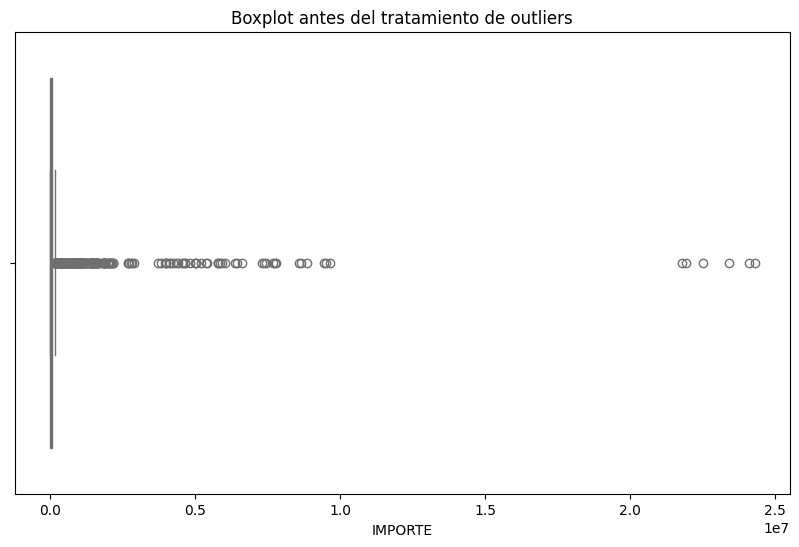

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot del tratamiento de datos
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_consumohdna, x='IMPORTE', color='skyblue')
plt.title('Boxplot antes del tratamiento de outliers')
plt.show()

In [ ]:
outliers_index = df_consumohdna[(df_consumohdna['IMPORTE'] < lower_bound_importe) | (df_consumohdna['IMPORTE'] > upper_bound_importe) |
                                (df_consumohdna['CONSUMO'] < lower_bound_consumo) | (df_consumohdna['CONSUMO'] > upper_bound_consumo) |
                                (df_consumohdna['NUM_CLIENTES'] < lower_bound_clientes) | (df_consumohdna['NUM_CLIENTES'] > upper_bound_clientes)].index

# Eliminar los registros outliers del dataframe
df_consumohdna_cleaned = df_consumohdna.drop(outliers_index)

# Mostrar la cantidad de registros eliminados
print(f"Se han eliminado {len(outliers_index)} registros outliers.")

# Verificar la forma del dataframe limpio
print("Forma del dataframe limpio:", df_consumohdna_cleaned.shape)

Se han eliminado 382 registros outliers.
Forma del dataframe limpio: (1668, 8)


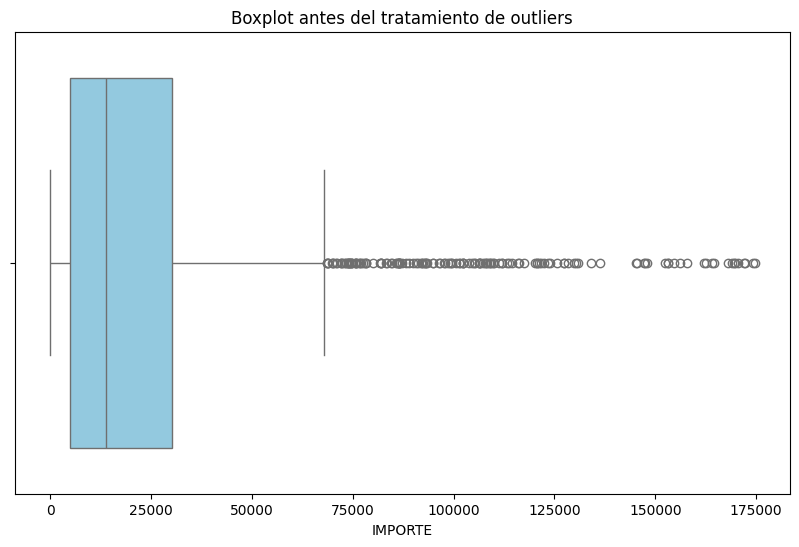

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot del tratamiento de datos
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_consumohdna_cleaned, x='IMPORTE', color='skyblue')
plt.title('Boxplot antes del tratamiento de outliers')
plt.show()

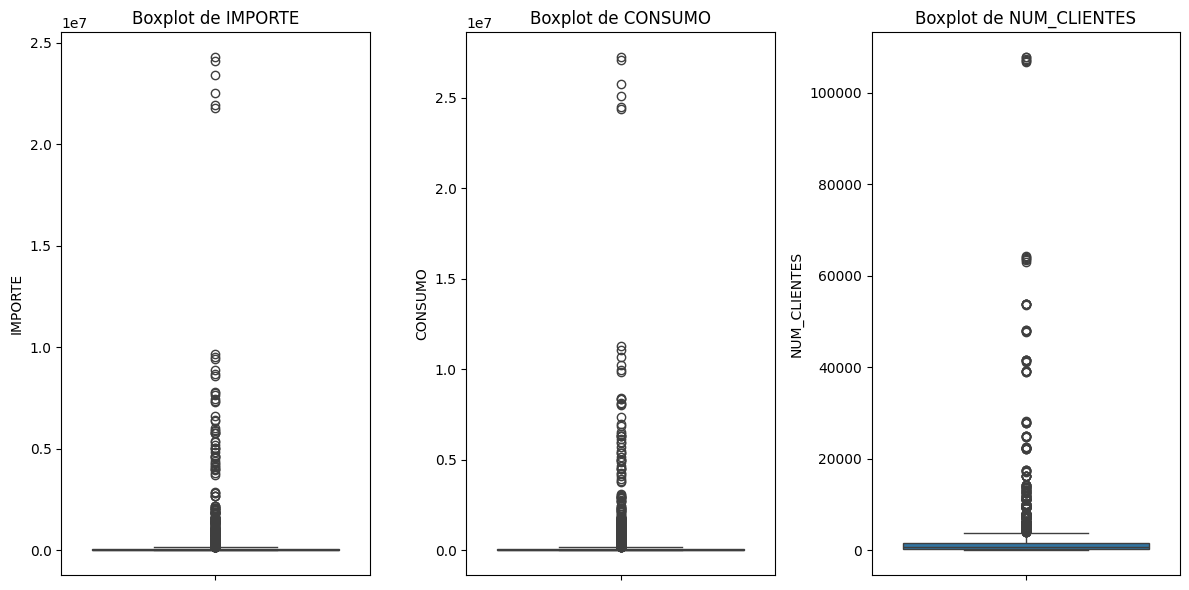

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear subplots para cada variable
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

# Boxplot para la variable 'IMPORTE'
sns.boxplot(y='IMPORTE', data=df_consumohdna, ax=axes[0])
axes[0].set_title('Boxplot de IMPORTE')

# Boxplot para la variable 'CONSUMO'
sns.boxplot(y='CONSUMO', data=df_consumohdna, ax=axes[1])
axes[1].set_title('Boxplot de CONSUMO')

# Boxplot para la variable 'NUM_CLIENTES'
sns.boxplot(y='NUM_CLIENTES', data=df_consumohdna, ax=axes[2])
axes[2].set_title('Boxplot de NUM_CLIENTES')

plt.tight_layout()
plt.show()


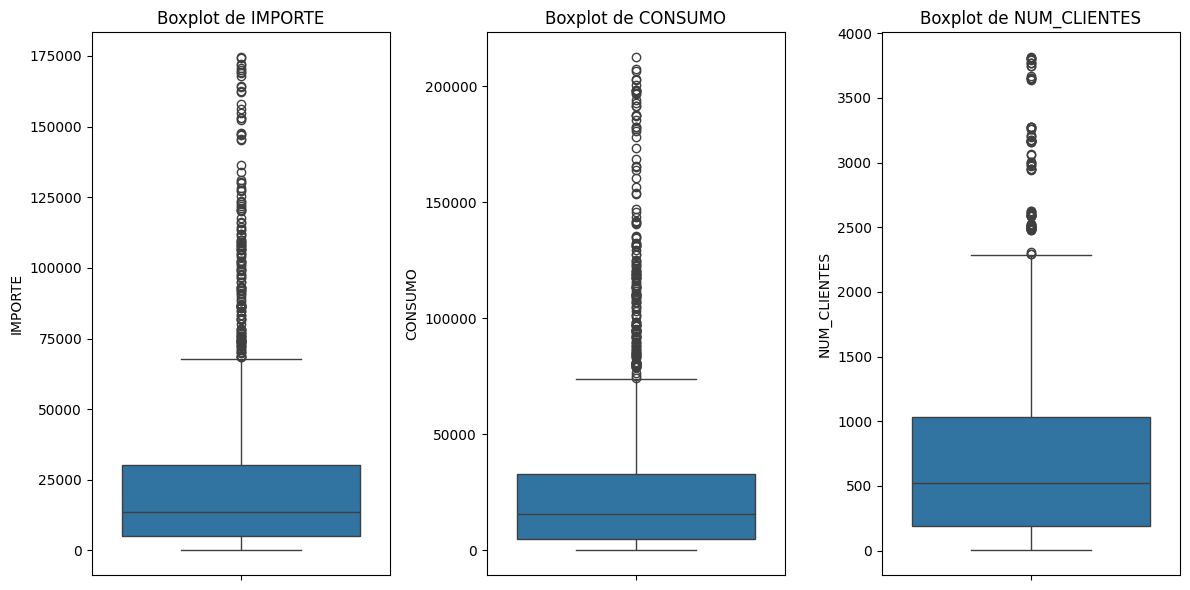

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear subplots para cada variable
fig, axes = plt.subplots(1, 3, figsize=(12, 6))

# Boxplot para la variable 'IMPORTE'
sns.boxplot(y='IMPORTE', data=df_consumohdna_cleaned, ax=axes[0])
axes[0].set_title('Boxplot de IMPORTE')

# Boxplot para la variable 'CONSUMO'
sns.boxplot(y='CONSUMO', data=df_consumohdna_cleaned, ax=axes[1])
axes[1].set_title('Boxplot de CONSUMO')

# Boxplot para la variable 'NUM_CLIENTES'
sns.boxplot(y='NUM_CLIENTES', data=df_consumohdna_cleaned, ax=axes[2])
axes[2].set_title('Boxplot de NUM_CLIENTES')

plt.tight_layout()
plt.show()

### 2.2.5 Basic Statistics

In [ ]:
# Calcular medidas estadísticas básicas para todas las columnas
summary_stats_all = df_consumohdna_cleaned[['CONSUMO','IMPORTE','NUM_CLIENTES']]

# Mostrar las medidas estadísticas
print("Medidas estadísticas para todas las columnas:")
print(summary_stats_all)

Medidas estadísticas para todas las columnas:
      CONSUMO  IMPORTE  NUM_CLIENTES
0    14903.00  9418.00           315
1    12255.30  7898.70           283
2     8587.00  8657.40           530
3        0.00     5.50             1
4    38419.90 33860.70           510
...       ...      ...           ...
2045    52.00    52.60             1
2046     7.00     7.10             1
2047   145.00   176.60             2
2048   155.00   160.40             1
2049   124.00   123.80             1

[1668 rows x 3 columns]


In [ ]:
#Calculamos la cantidad de valores unico por variable
df_consumohdna.nunique().sort_values()

AÑO                2
MES                6
DEPARTAMENTO      13
PROVINCIA         66
DISTRITO         346
NUM_CLIENTES    1122
CONSUMO         1988
IMPORTE         2035
dtype: int64

In [ ]:
#Calculamos la cantidad de valores duplicados
df_consumohdna.duplicated().sum()

0

## 2.3 EDA

### 2.3.1 Univariant Analysis


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Separamos en numéricas y categoricas
df_numeric = df_consumohdna_cleaned[['CONSUMO','IMPORTE','NUM_CLIENTES']]
df_categorical = df_consumohdna_cleaned[['AÑO', 'MES', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO']]

In [ ]:
# Simetría y curtosis de las variables numéricas
simetria = df_numeric.skew()
curtosis = df_numeric.kurtosis()

#### Variables numéricas

In [ ]:
# Análisis de variables numéricas

## Medidas de tendencia central
for var_num in df_consumohdna_cleaned.select_dtypes(include='number').columns:
    print(f"\nMedidas de tendencia central para {var_num}:")
    print(f"Media: {df_consumohdna_cleaned[var_num].mean()}")
    print(f"Mediana: {df_consumohdna_cleaned[var_num].median()}")
    print(f"Moda: {df_consumohdna_cleaned[var_num].mode()}")


Medidas de tendencia central para AÑO:
Media: 2023.339928057554
Mediana: 2023.0
Moda: 0    2023
Name: AÑO, dtype: int64

Medidas de tendencia central para MES:
Media: 7.443045563549161
Mediana: 9.0
Moda: 0    2
Name: MES, dtype: int64

Medidas de tendencia central para CONSUMO:
Media: 28274.004285971227
Mediana: 15517.751499999998
Moda: 0   0.00
Name: CONSUMO, dtype: float64

Medidas de tendencia central para IMPORTE:
Media: 24701.94322541966
Mediana: 13760.349999999999
Moda: 0   5.60
Name: IMPORTE, dtype: float64

Medidas de tendencia central para NUM_CLIENTES:
Media: 722.7739808153477
Mediana: 526.0
Moda: 0    1
Name: NUM_CLIENTES, dtype: int64


In [ ]:
## Medidas de dispersión
for var_num in df_consumohdna_cleaned.select_dtypes(include='number').columns:
    print(f"\nMedidas de dispersión para {var_num}:")
    print(f"Rango: {df_consumohdna_cleaned[var_num].max() - df_consumohdna_cleaned[var_num].min()}")
    print(f"Varianza: {df_consumohdna_cleaned[var_num].var()}")
    print(f"Desviación estándar: {df_consumohdna_cleaned[var_num].std()}")


Medidas de dispersión para AÑO:
Rango: 1
Varianza: 0.22451157250564271
Desviación estándar: 0.4738265215304465

Medidas de dispersión para MES:
Rango: 11
Varianza: 19.074738649392426
Desviación estándar: 4.367463640305712

Medidas de dispersión para CONSUMO:
Rango: 212568.7648
Varianza: 1384313211.3010764
Desviación estándar: 37206.359823302744

Medidas de dispersión para IMPORTE:
Rango: 174622.6
Varianza: 955955101.445527
Desviación estándar: 30918.523597441177

Medidas de dispersión para NUM_CLIENTES:
Rango: 3815
Varianza: 545194.0706603284
Desviación estándar: 738.3725825491683


<Axes: >

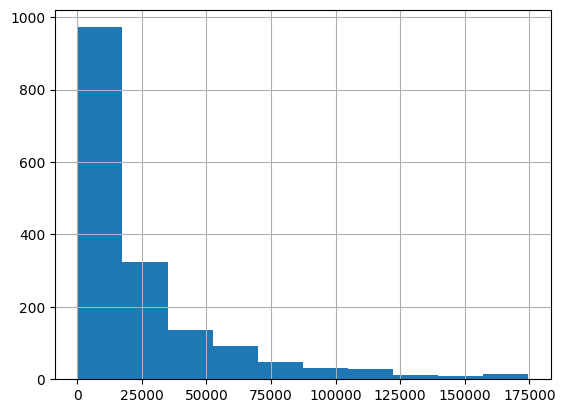

In [ ]:
df_consumohdna_cleaned['IMPORTE'].hist()

<Axes: >

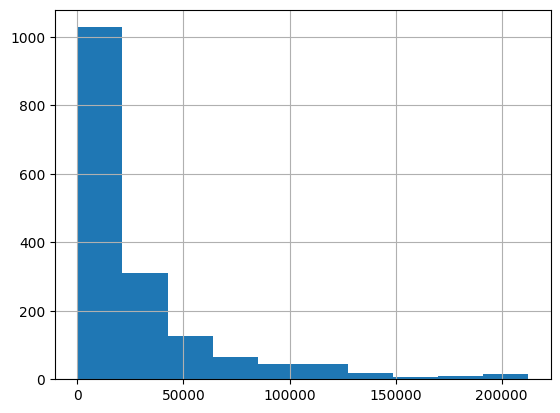

In [ ]:
df_consumohdna_cleaned['CONSUMO'].hist()

<Axes: >

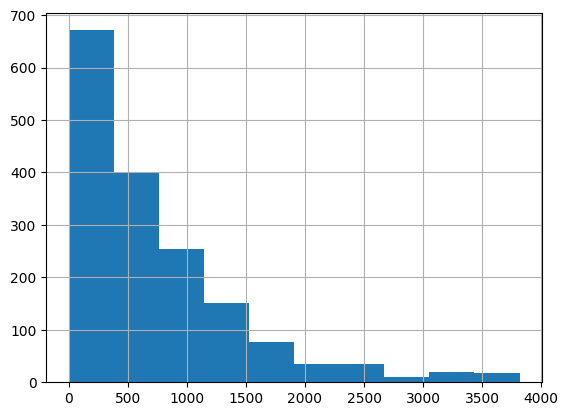

In [ ]:
df_consumohdna_cleaned['NUM_CLIENTES'].hist()

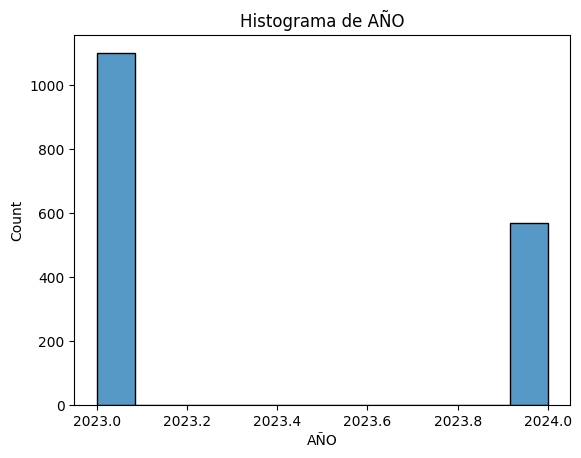

<ipython-input-164-dfcdfb5f771f>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_consumohdna_cleaned[var_num], kde=True)


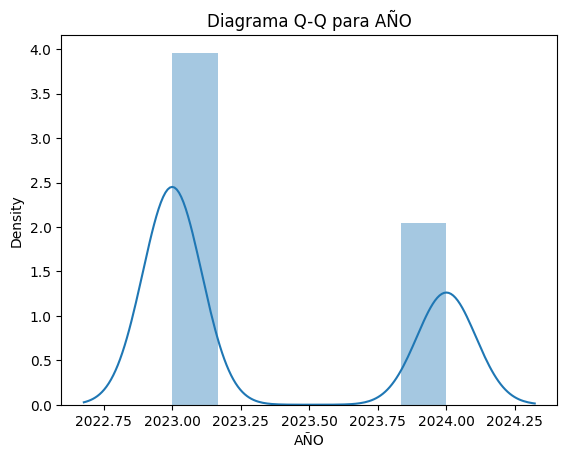

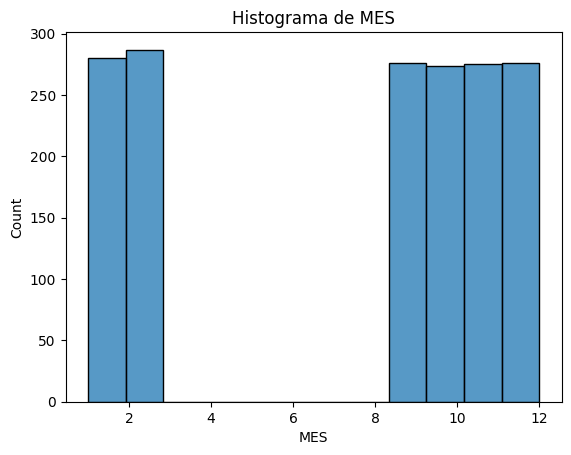

<ipython-input-164-dfcdfb5f771f>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_consumohdna_cleaned[var_num], kde=True)


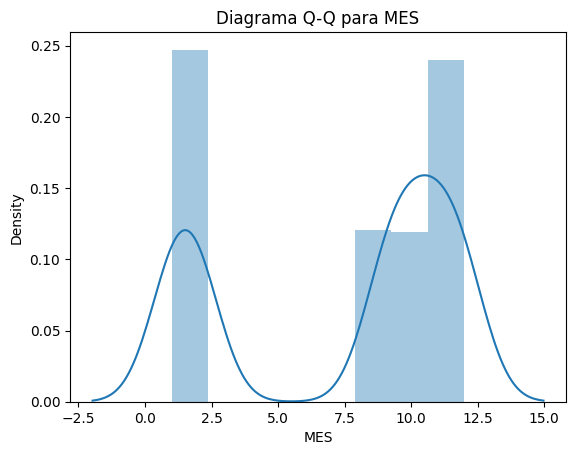

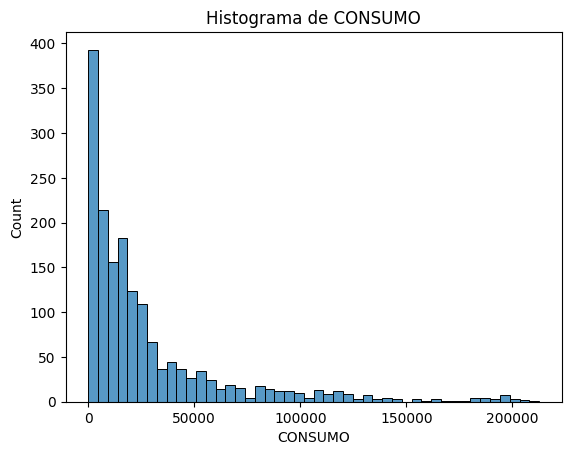

<ipython-input-164-dfcdfb5f771f>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_consumohdna_cleaned[var_num], kde=True)


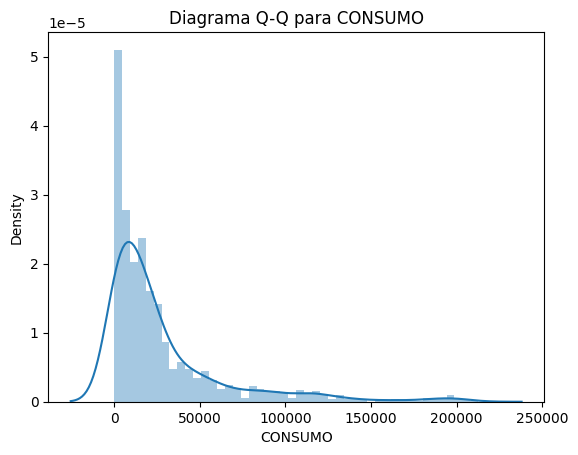

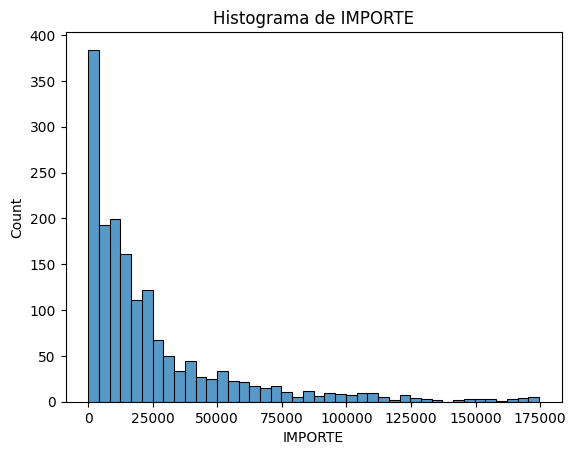

<ipython-input-164-dfcdfb5f771f>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_consumohdna_cleaned[var_num], kde=True)


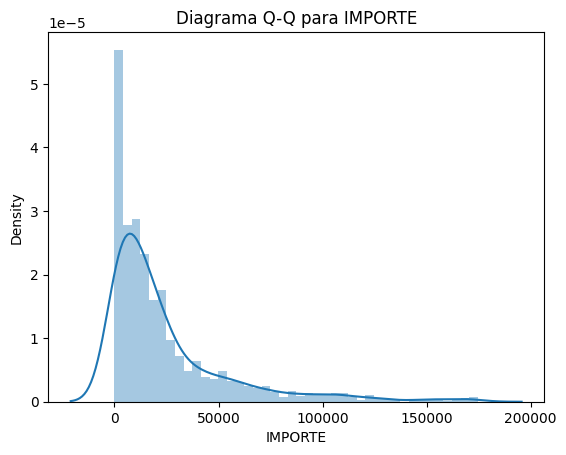

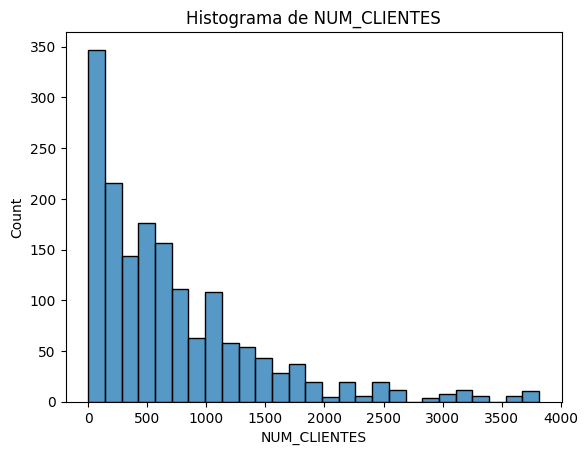

<ipython-input-164-dfcdfb5f771f>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_consumohdna_cleaned[var_num], kde=True)


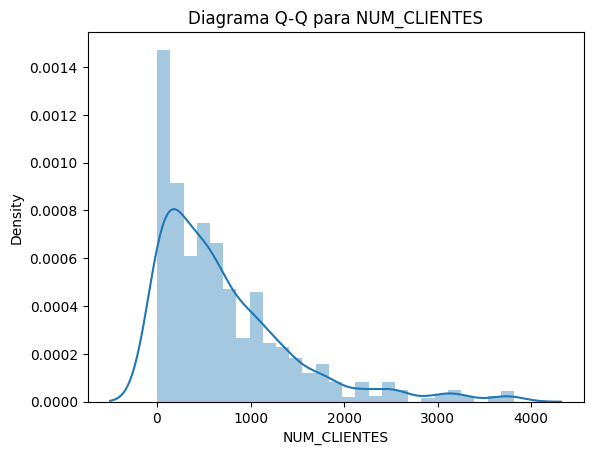

In [ ]:
## Visualización de Gráfico de Barras, Histogramas y Q-Q
for var_num in df_consumohdna_cleaned.select_dtypes(include='number').columns:
    sns.histplot(df_consumohdna_cleaned[var_num])
    plt.title(f"Histograma de {var_num}")
    plt.show()

    sns.distplot(df_consumohdna_cleaned[var_num], kde=True)
    plt.title(f"Diagrama Q-Q para {var_num}")
    plt.show()

### 2.3.2 Multivariant Analysis


In [ ]:
# Correlation matrix (Pearson's correlation)
correlation_matrix = df_numeric.corr()
print("\nCorrelation Matrix (Pearson's Correlation):")
display(correlation_matrix.round(2))


Correlation Matrix (Pearson's Correlation):


,CONSUMO,IMPORTE,NUM_CLIENTES
CONSUMO,1.00,0.98,0.63
IMPORTE,0.98,1.00,0.71
NUM_CLIENTES,0.63,0.71,1.00


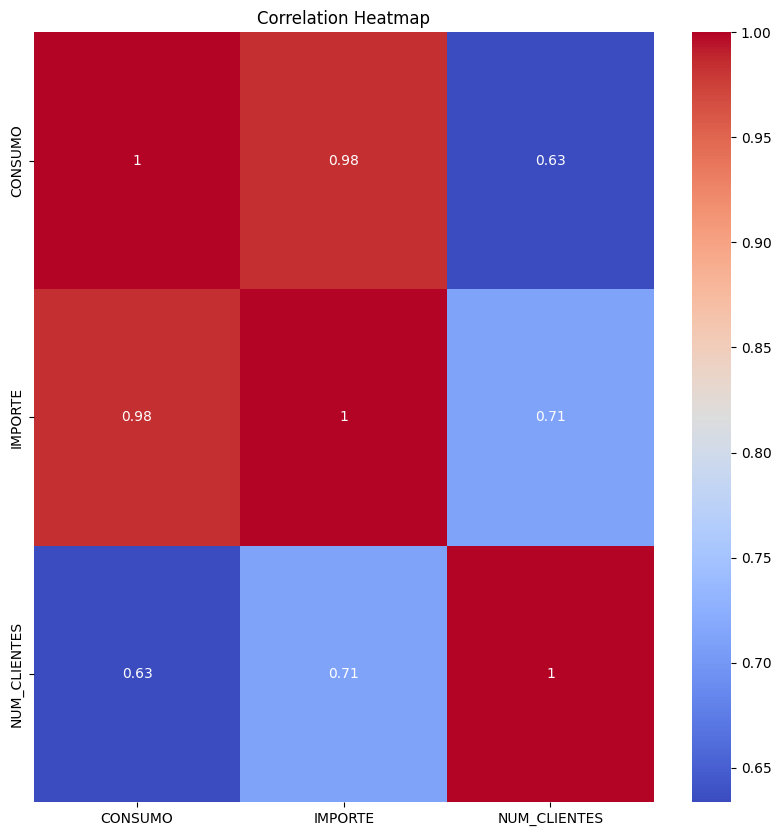

In [ ]:
# Heatmap visualization of correlbation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## 2.4. Transformación de datos


In [ ]:
# Importar las librerías necesarias
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from datetime import datetime

### Feature Engineering Encoders

In [ ]:
# Codificación de etiquetas para las variables categóricas
encoder = LabelEncoder()

In [ ]:
# Definimos las categoricas
categorical_features = ['DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', ]
# Creamos un nuevo df para la transformacion
df_consumohdna_transform = df_consumohdna_cleaned

In [ ]:
category_encodings = {}
for col in categorical_features:
    value_counts = df_consumohdna_transform[col].value_counts().sort_index()
    category_encodings[col] = dict(zip(value_counts.index, range(len(value_counts))))
    df_consumohdna_transform[col] = encoder.fit_transform(df_consumohdna_transform[col])

In [ ]:
# Create a dictionary to store the DataFrames
dfs = []

# Iterate through the features and their encoding maps
for feature, encoding_map in category_encodings.items():
    category_map = {value: key for key, value in encoding_map.items()}
    # Create a DataFrame from the encoding map
    df = pd.DataFrame.from_dict(category_map, orient='index', columns=['CATEGORIA'])
    df['FEATURE'] = feature
    # Store the DataFrame in the dictionary
    dfs.append(df)

# Concatenate the DataFrames into a single DataFrame
df_encoded = pd.concat(dfs, ignore_index=False)



In [ ]:
for feature, df in df_encoded.groupby('FEATURE'):
    df['VALOR'] = df.index  # Rename index to 'VALOR'
    df.reset_index(inplace=True)  # Reset index to a regular column

In [ ]:
df_encoded[df_encoded['FEATURE']=='DEPARTAMENTO']

,CATEGORIA,FEATURE
0,AMAZONAS,DEPARTAMENTO
1,ANCASH,DEPARTAMENTO
2,AYACUCHO,DEPARTAMENTO
3,CAJAMARCA,DEPARTAMENTO
4,HUANCAVELICA,DEPARTAMENTO
5,HUANUCO,DEPARTAMENTO
6,JUNIN,DEPARTAMENTO
7,LA LIBERTAD,DEPARTAMENTO
8,LAMBAYEQUE,DEPARTAMENTO
9,LIMA,DEPARTAMENTO


In [ ]:
df_encoded[df_encoded['FEATURE']=='PROVINCIA']

,CATEGORIA,FEATURE
0,AIJA,PROVINCIA
1,AMBO,PROVINCIA
2,ANTONIO RAYMONDI,PROVINCIA
3,ASCOPE,PROVINCIA
4,BOLIVAR,PROVINCIA
...,...,...
60,TRUJILLO,PROVINCIA
61,TUMBES,PROVINCIA
62,VILCAS HUAMAN,PROVINCIA
63,VIRU,PROVINCIA


In [ ]:
df_encoded[df_encoded['FEATURE']=='DISTRITO']

,CATEGORIA,FEATURE
0,ABELARDO PARDO LEZAMETA,DISTRITO
1,ACO,DISTRITO
2,ACOBAMBA,DISTRITO
3,ACOPAMPA,DISTRITO
4,ACZO,DISTRITO
...,...,...
282,YAUTAN,DISTRITO
283,YAUYA,DISTRITO
284,YUNGAR,DISTRITO
285,YUPAN,DISTRITO


In [ ]:
# Verificamos el cambio
df_encoded.head()

,CATEGORIA,FEATURE
0,AMAZONAS,DEPARTAMENTO
1,ANCASH,DEPARTAMENTO
2,AYACUCHO,DEPARTAMENTO
3,CAJAMARCA,DEPARTAMENTO
4,HUANCAVELICA,DEPARTAMENTO


In [ ]:
df_consumohdna_transform

,AÑO,MES,DEPARTAMENTO,PROVINCIA,DISTRITO,CONSUMO,IMPORTE,NUM_CLIENTES
0,2023,9,0,12,20,14903.00,9418.00,315
1,2023,9,0,12,63,12255.30,7898.70,283
2,2023,9,0,36,65,8587.00,8657.40,530
3,2023,9,0,49,235,0.00,5.50,1
4,2023,9,1,0,6,38419.90,33860.70,510
...,...,...,...,...,...,...,...,...
2045,2024,2,10,44,50,52.00,52.60,1
2046,2024,2,11,25,103,7.00,7.10,1
2047,2024,2,11,46,42,145.00,176.60,2
2048,2024,2,11,46,204,155.00,160.40,1


### Insights

<Figure size 1000x600 with 0 Axes>

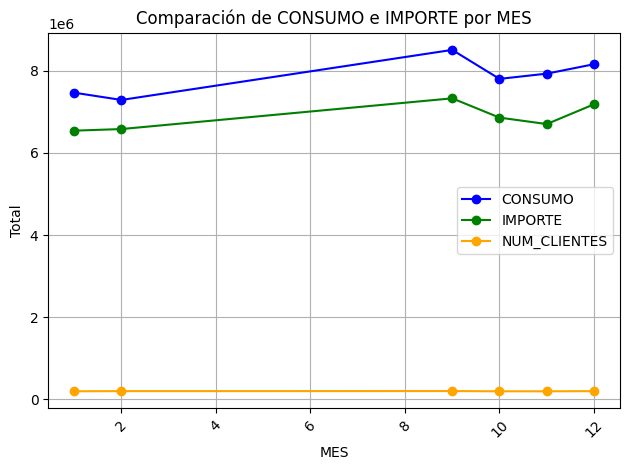

In [ ]:
grouped_data = df_consumohdna_cleaned.groupby('MES')[['CONSUMO', 'IMPORTE','NUM_CLIENTES']].sum()

plt.figure(figsize=(10, 6))
grouped_data.plot(kind='line', marker='o', linestyle='-', color=['blue', 'green','orange'])
plt.title('Comparación de CONSUMO e IMPORTE por MES')
plt.xlabel('MES')
plt.ylabel('Total')
plt.xticks(rotation=45)
plt.legend(['CONSUMO', 'IMPORTE', 'NUM_CLIENTES'])
plt.grid(True)
plt.tight_layout()
plt.show()

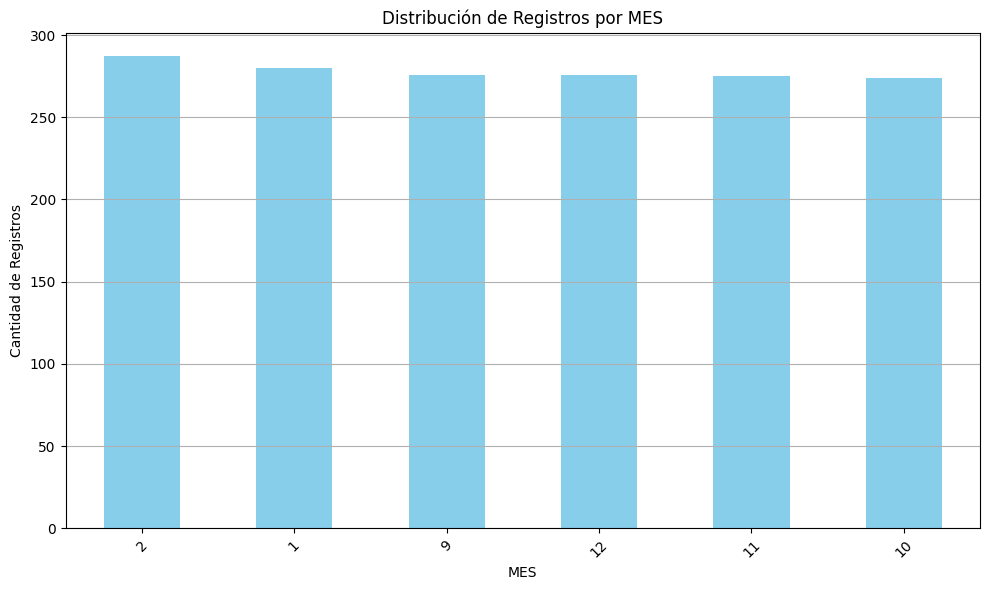

In [ ]:
# Count records by MES
mes_counts = df_consumohdna_cleaned['MES'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
mes_counts.plot(kind='bar', color='skyblue')
plt.title('Distribución de Registros por MES')
plt.xlabel('MES')
plt.ylabel('Cantidad de Registros')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 3000x600 with 0 Axes>

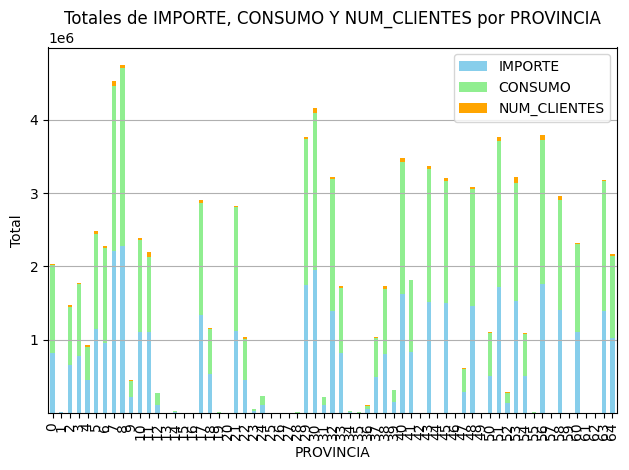

In [ ]:
# Group data by PROVINCIA and calculate total IMPORTE and CONSUMO
grouped_data = df_consumohdna_cleaned.groupby('PROVINCIA')[['IMPORTE', 'CONSUMO', 'NUM_CLIENTES']].sum()

# Create a bar chart
plt.figure(figsize=(30, 6))
grouped_data.plot(kind='bar', stacked=True, color=['skyblue', 'lightgreen', 'orange'])
plt.title('Totales de IMPORTE, CONSUMO Y NUM_CLIENTES por PROVINCIA')
plt.xlabel('PROVINCIA')
plt.ylabel('Total')
plt.xticks(rotation=90)
plt.legend(['IMPORTE', 'CONSUMO', 'NUM_CLIENTES'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<Figure size 1500x800 with 0 Axes>

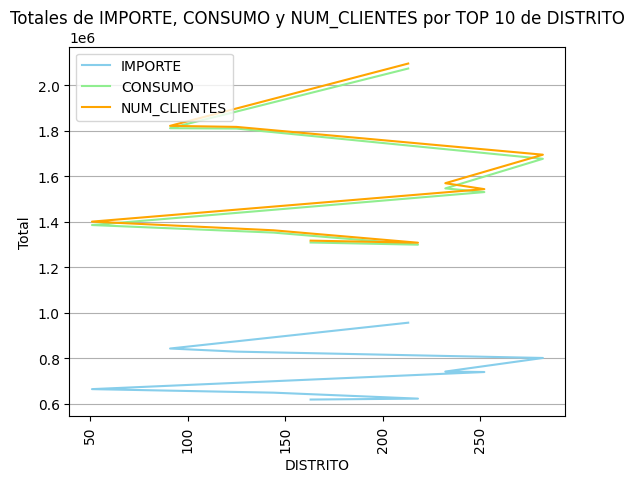

In [ ]:
# Group data by DISTRITO and calculate total IMPORTE and CONSUMO
grouped_data = df_consumohdna_cleaned.groupby('DISTRITO')[['IMPORTE', 'CONSUMO', 'NUM_CLIENTES']].sum()

grouped_data_sorted = grouped_data.sort_values(by=['IMPORTE', 'CONSUMO', 'NUM_CLIENTES'], ascending=False)

top_n_districts = grouped_data_sorted[:10]

# Create a bar chart
plt.figure(figsize=(15, 8))
top_n_districts.plot(kind='line', stacked=True, color=['skyblue', 'lightgreen', 'orange'])
plt.title('Totales de IMPORTE, CONSUMO y NUM_CLIENTES por TOP 10 de DISTRITO')
plt.xlabel('DISTRITO')
plt.ylabel('Total')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(['IMPORTE', 'CONSUMO', 'NUM_CLIENTES'])
plt.grid(axis='y')
plt.show()

In [ ]:
df.drop("index", axis='columns')

,CATEGORIA,FEATURE,VALOR
0,AIJA,PROVINCIA,0
1,AMBO,PROVINCIA,1
2,ANTONIO RAYMONDI,PROVINCIA,2
3,ASCOPE,PROVINCIA,3
4,BOLIVAR,PROVINCIA,4
...,...,...,...
60,TRUJILLO,PROVINCIA,60
61,TUMBES,PROVINCIA,61
62,VILCAS HUAMAN,PROVINCIA,62
63,VIRU,PROVINCIA,63


# 4.1 Modelización

## 4.1.1 Regresión Lineal

In [ ]:
df_consumohdna_transform

,AÑO,MES,DEPARTAMENTO,PROVINCIA,DISTRITO,CONSUMO,IMPORTE,NUM_CLIENTES
0,2023,9,0,12,20,14903.00,9418.00,315
1,2023,9,0,12,63,12255.30,7898.70,283
2,2023,9,0,36,65,8587.00,8657.40,530
3,2023,9,0,49,235,0.00,5.50,1
4,2023,9,1,0,6,38419.90,33860.70,510
...,...,...,...,...,...,...,...,...
2045,2024,2,10,44,50,52.00,52.60,1
2046,2024,2,11,25,103,7.00,7.10,1
2047,2024,2,11,46,42,145.00,176.60,2
2048,2024,2,11,46,204,155.00,160.40,1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

In [ ]:
# Variables seleccionadas: Año, DEPARTAMENTO, PROVINCIA, DISTRITO, TARIFA
selected_columns = ['AÑO', 'MES', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'CONSUMO']

# Crear un nuevo dataframe con las columnas seleccionadas
df_selected = df_consumohdna_transform[selected_columns]
df_selected = df_selected[df_selected['CONSUMO'] > 0]

# Verificar el nuevo dataframe
df_selected

,AÑO,MES,DEPARTAMENTO,PROVINCIA,DISTRITO,CONSUMO
0,2023,9,0,12,20,14903.00
1,2023,9,0,12,63,12255.30
2,2023,9,0,36,65,8587.00
4,2023,9,1,0,6,38419.90
5,2023,9,1,0,77,13177.65
...,...,...,...,...,...,...
2045,2024,2,10,44,50,52.00
2046,2024,2,11,25,103,7.00
2047,2024,2,11,46,42,145.00
2048,2024,2,11,46,204,155.00


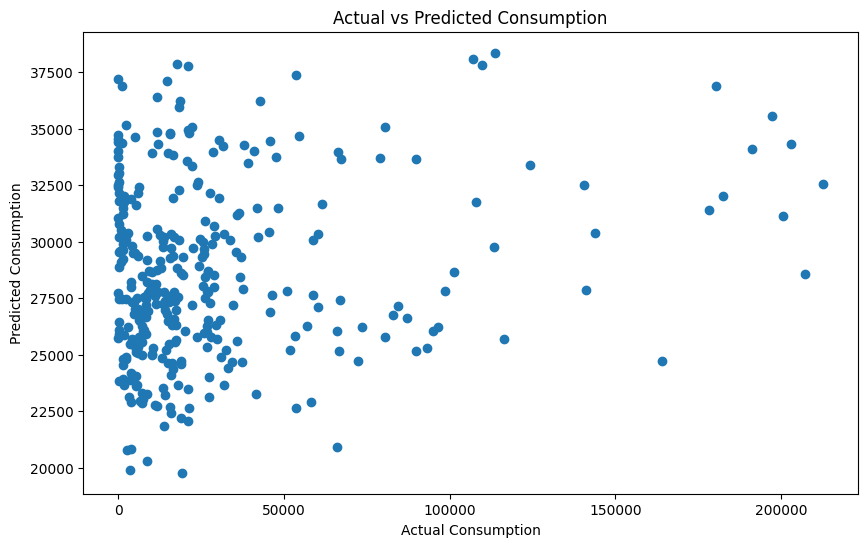

In [ ]:
# Crear variables independientes (X) y dependientes (y)
X = df_selected.drop(columns=['CONSUMO'])
y = df_selected['CONSUMO']

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluación de desempeño
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Visualización del desempeño
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Consumption')
plt.ylabel('Predicted Consumption')
plt.title('Actual vs Predicted Consumption')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 1525152958.6853123


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")


R² Score: 0.030682938422906703


In [ ]:
from itertools import product
future_year = 2025  # Cambia esto según el año futuro que deseas predecir
future_month = 3

# Obtener todas las combinaciones posibles de DEPARTAMENTO, PROVINCIA y DISTRITO
departments = df_selected['DEPARTAMENTO'].unique()
provinces = df_selected['PROVINCIA'].unique()
districts = df_selected['DISTRITO'].unique()

# Crear todas las combinaciones posibles
future_combinations = list(product([future_year], [future_month], departments, provinces, districts))

# Crear el DataFrame de predicciones futuras
future_years = pd.DataFrame(future_combinations, columns=['AÑO', 'MES', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO'])

# Predecir el consumo futuro
future_predictions = model.predict(future_years)

# Crear un dataframe con los resultados
future_results = future_years.copy()
future_results['Predicted_Consumption'] = future_predictions

future_results

,AÑO,MES,DEPARTAMENTO,PROVINCIA,DISTRITO,Predicted_Consumption
0,2025,3,0,12,20,19880.54
1,2025,3,0,12,63,20608.53
2,2025,3,0,12,65,20642.40
3,2025,3,0,12,6,19643.52
4,2025,3,0,12,77,20845.56
...,...,...,...,...,...,...
237947,2025,3,10,25,106,34388.33
237948,2025,3,10,25,175,35556.51
237949,2025,3,10,25,50,33440.25
237950,2025,3,10,25,103,34337.54


## 4.1.2 K-means

In [ ]:
# Supongamos que df_consumohdna_transform es tu dataframe
df = df_consumohdna_transform.copy()
# Selección de características relevantes
features = ['CONSUMO', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO']

# Preprocesamiento: Remover filas con valores faltantes y normalizar los datos
df = df.dropna(subset=features)
X = df[features]

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

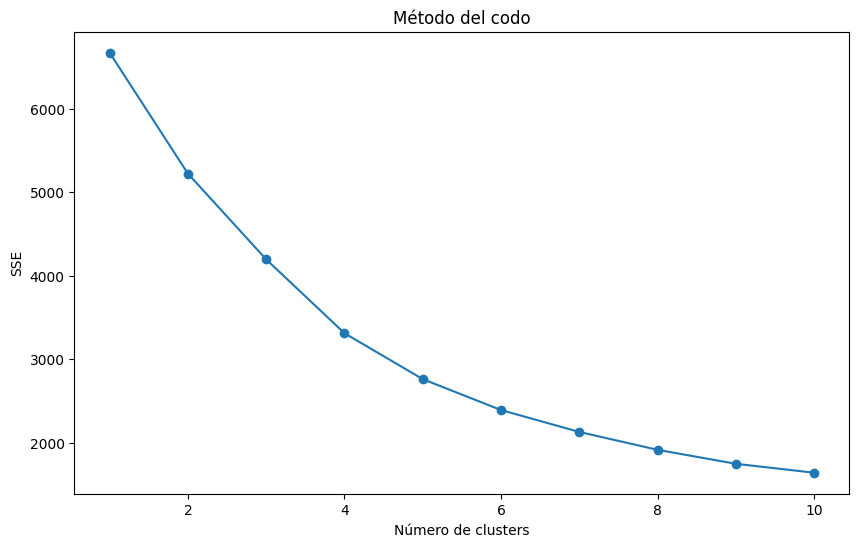

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.title('Método del codo')
plt.show()

In [ ]:
# Seleccionar el número óptimo de clusters (por ejemplo, k=4)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


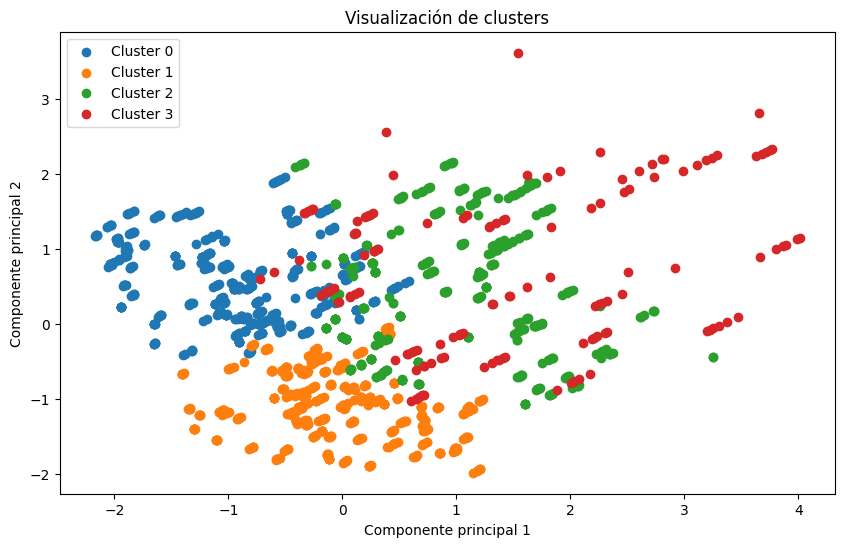

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
for cluster in range(k):
    plt.scatter(X_pca[df['Cluster'] == cluster, 0], X_pca[df['Cluster'] == cluster, 1], label=f'Cluster {cluster}')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Visualización de clusters')
plt.legend()
plt.show()

In [ ]:
# Calcular las métricas de evaluación
silhouette_avg = silhouette_score(X_scaled, df['Cluster'])
davies_bouldin_avg = davies_bouldin_score(X_scaled, df['Cluster'])
calinski_harabasz_avg = calinski_harabasz_score(X_scaled, df['Cluster'])

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Score: {davies_bouldin_avg}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_avg}")

Silhouette Score: 0.2792334997411427
Davies-Bouldin Score: 1.2133774607718997
Calinski-Harabasz Index: 562.755594553962


## 4.1.3 Random Forest

In [ ]:
df_consumohdna_transform

,AÑO,MES,DEPARTAMENTO,PROVINCIA,DISTRITO,CONSUMO,IMPORTE,NUM_CLIENTES
0,2023,9,0,12,20,14903.00,9418.00,315
1,2023,9,0,12,63,12255.30,7898.70,283
2,2023,9,0,36,65,8587.00,8657.40,530
3,2023,9,0,49,235,0.00,5.50,1
4,2023,9,1,0,6,38419.90,33860.70,510
...,...,...,...,...,...,...,...,...
2045,2024,2,10,44,50,52.00,52.60,1
2046,2024,2,11,25,103,7.00,7.10,1
2047,2024,2,11,46,42,145.00,176.60,2
2048,2024,2,11,46,204,155.00,160.40,1


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Cargar los datos
# Supongamos que ya tienes cargado tu DataFrame df_consumohdna_transform con los datos
df = df_consumohdna_transform[['AÑO','DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'CONSUMO']]

# Verificar los primeros registros para asegurarnos que los datos están cargados correctamente
print(df.head())


    AÑO  DEPARTAMENTO  PROVINCIA  DISTRITO  CONSUMO
0  2023             0         12        20 14903.00
1  2023             0         12        63 12255.30
2  2023             0         36        65  8587.00
3  2023             0         49       235     0.00
4  2023             1          0         6 38419.90


In [ ]:
# Definir las características (X) y la variable objetivo (y)
X = df.drop('CONSUMO', axis=1)  # Características: DEPARTAMENTO, PROVINCIA, DISTRITO
y = df['CONSUMO']  # Variable objetivo: CONSUMO

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Predecir el consumo utilizando el modelo entrenado
y_pred = rf_model.predict(X)

# Calcular la diferencia entre el consumo real y el predicho
df['Consumo_Predicho'] = y_pred
df['Diferencia'] = abs(df['CONSUMO'] - df['Consumo_Predicho'])

# Definir un umbral para identificar anomalías (por ejemplo, el 5% de las mayores diferencias)
umbral_anomalia = df['Diferencia'].nlargest(int(len(df) * 0.20)).iloc[-1]

# Identificar registros con anomalías
anomalias = df[df['Diferencia'] > umbral_anomalia]

# Mostrar los registros con anomalías
print("Registros con anomalías:")
print(anomalias)


Registros con anomalías:
       AÑO  DEPARTAMENTO  PROVINCIA  DISTRITO   CONSUMO  Consumo_Predicho  \
0     2023             0         12        20  14903.00          17468.24   
4     2023             1          0         6  38419.90          41555.07   
7     2023             1          0       137 165146.27         153329.72   
20    2023             1          5        58  75336.61          70170.03   
24    2023             1          5       139   1302.28           8948.81   
...    ...           ...        ...       ...       ...               ...   
2017  2024             7         56       213 185485.30         191096.18   
2018  2024             7         56       241  14283.46          24844.76   
2020  2024             7         56       255  15000.00          19037.27   
2033  2024             7         63        48 123229.19         129982.93   
2034  2024             7         63        91 198514.76         190223.41   

      Diferencia  
0        2565.24  
4        313

<ipython-input-198-904574673e6b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Consumo_Predicho'] = y_pred
<ipython-input-198-904574673e6b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Diferencia'] = abs(df['CONSUMO'] - df['Consumo_Predicho'])


# 4.2 Optimización


###4.2.1 Regresión Lineal

In [ ]:
from sklearn.preprocessing import StandardScaler

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Mean Squared Error (MSE): 1085914389.8611429
R² Score: -0.040573194403717316


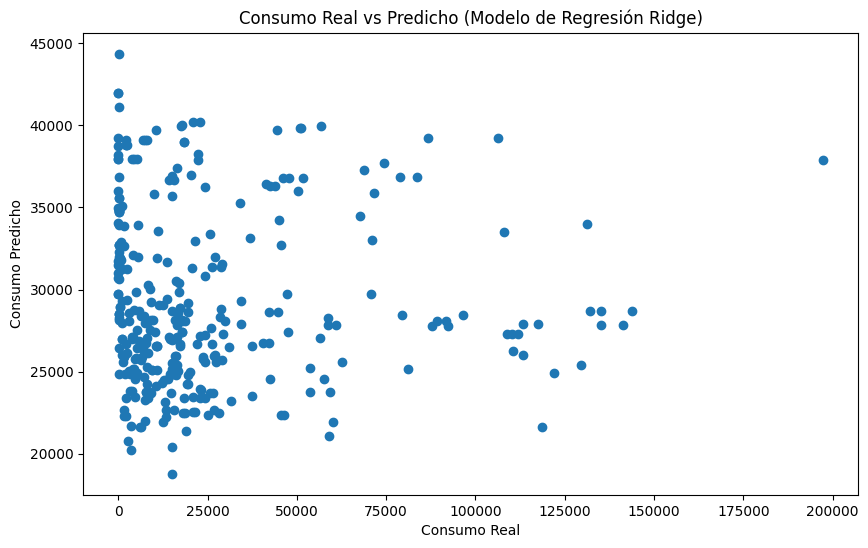

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Inicializar el modelo Ridge
ridge = Ridge()

# Definir los parámetros a ajustar
params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}  # Valores de alpha a probar

# Configurar la búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(estimator=ridge, param_grid=params, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_scaled, y_train)

# Obtener el mejor modelo y evaluarlo en el conjunto de prueba
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Evaluación de desempeño
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R² Score: {r2}')

# Visualización del desempeño
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Consumo Real')
plt.ylabel('Consumo Predicho')
plt.title('Consumo Real vs Predicho (Modelo de Regresión Ridge)')
plt.show()


#### 4.2.1.1 Random Forest Regressor

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Supongamos que df_selected ya está cargado con los datos adecuados
# Mostrar los primeros datos para verificar
df_selected.head()

# Crear variables independientes (X) y dependientes (y)
X = df_selected.drop(columns=['CONSUMO'])
y = df_selected['CONSUMO']

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo
model = RandomForestRegressor(random_state=42)

# Definir los hiperparámetros a buscar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Búsqueda de hiperparámetros
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {grid_search.best_params_}")

Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# Entrenar el modelo con los mejores hiperparámetros
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Predecir el conjunto de prueba
y_pred = best_model.predict(X_test)

# Evaluación de desempeño
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 188354539.12364262
R² Score: 0.8802905194798183


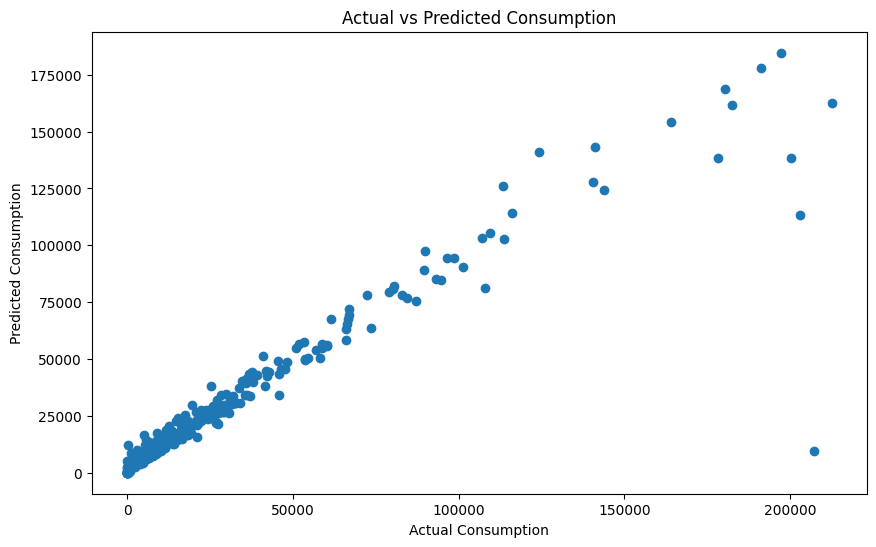

In [ ]:
# Visualización del desempeño
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Consumption')
plt.ylabel('Predicted Consumption')
plt.title('Actual vs Predicted Consumption')
plt.show()

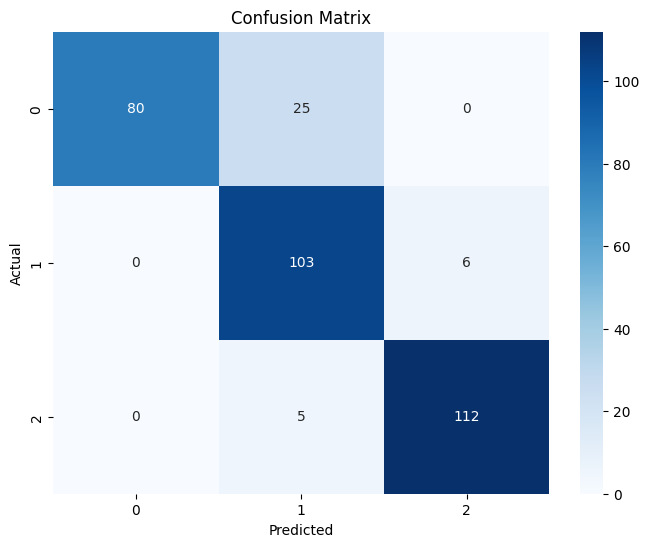

In [ ]:
# Matriz de confusión
thresholds = [y_train.quantile(0.33), y_train.quantile(0.66)]
y_test_class = pd.cut(y_test, bins=[-np.inf] + thresholds + [np.inf], labels=[0, 1, 2])
y_pred_class = pd.cut(y_pred, bins=[-np.inf] + thresholds + [np.inf], labels=[0, 1, 2])
conf_matrix = confusion_matrix(y_test_class, y_pred_class)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Calcular métricas de clasificación
accuracy = accuracy_score(y_test_class, y_pred_class)
precision = precision_score(y_test_class, y_pred_class, average='macro')
recall = recall_score(y_test_class, y_pred_class, average='macro')
f1 = f1_score(y_test_class, y_pred_class, average='macro')
roc_auc = roc_auc_score(pd.get_dummies(y_test_class), pd.get_dummies(y_pred_class), average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC: {roc_auc}")

Accuracy: 0.8912386706948641
Precision: 0.9078628775328151
Recall: 0.8880412825366953
F1 Score: 0.8897653412160181
ROC AUC: 0.9168252215495635


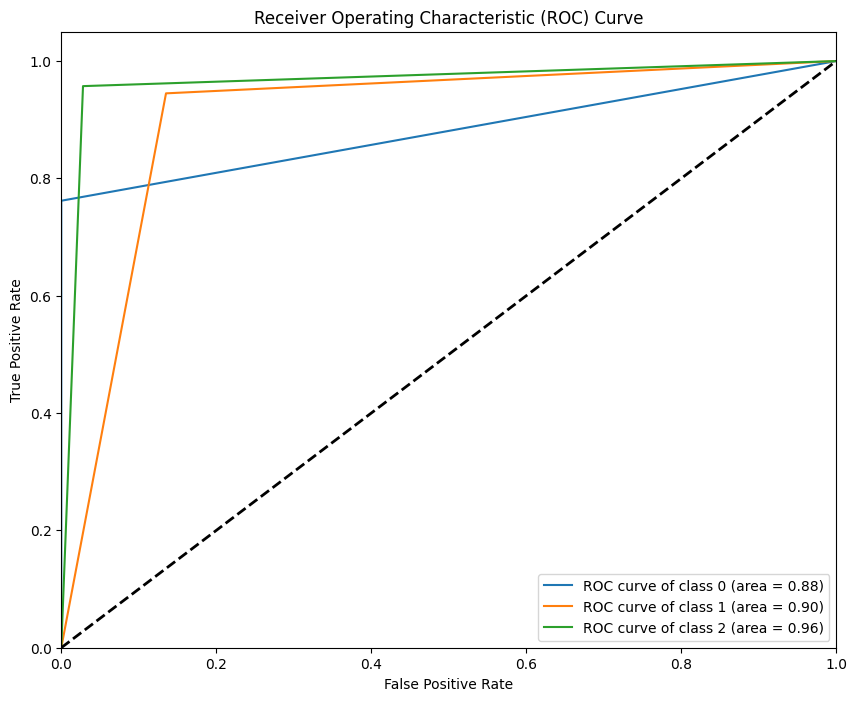

In [ ]:
# Curva ROC
fpr = {}
tpr = {}
roc_auc_dict = {}
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(pd.get_dummies(y_test_class).iloc[:, i], pd.get_dummies(y_pred_class).iloc[:, i])
    roc_auc_dict[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (area = {roc_auc_dict[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

###4.2.2 K-Means


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

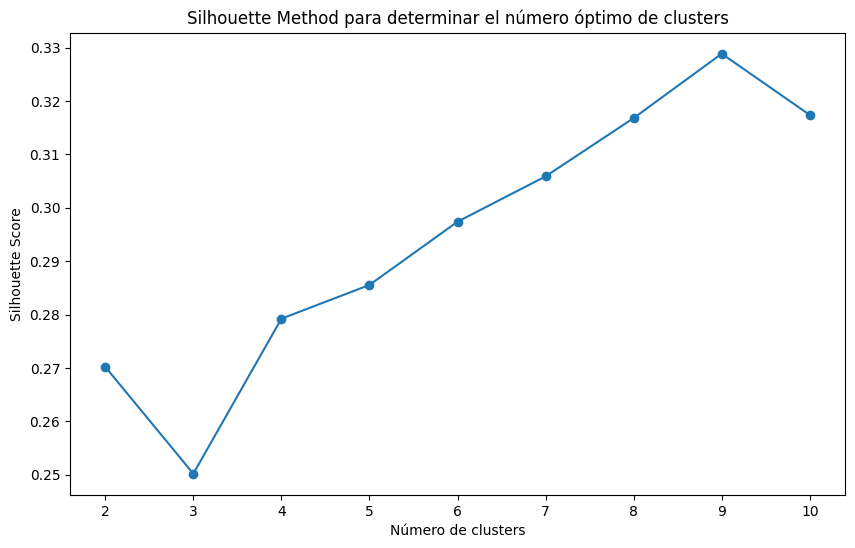

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method para determinar el número óptimo de clusters')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

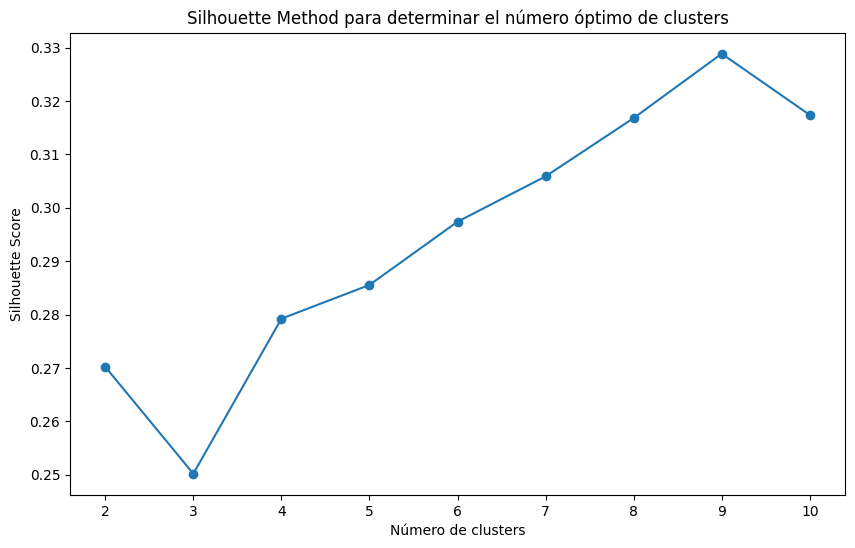

Silhouette Score para 10 clusters: 0.31739156615981096


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Supongamos que X_scaled es tu matriz de características normalizadas
k = 10  # Número de clusters actual

# Probar diferentes números de clusters y evaluar el Silhouette Score
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, max_iter=500, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Graficar los resultados del Método de la Silueta
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method para determinar el número óptimo de clusters')
plt.show()

# Seleccionar el número óptimo de clusters basado en el gráfico (por ejemplo, k=4)
k = 10
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Calcular el Silhouette Score para el número óptimo de clusters
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score para {k} clusters: {silhouette_avg}")


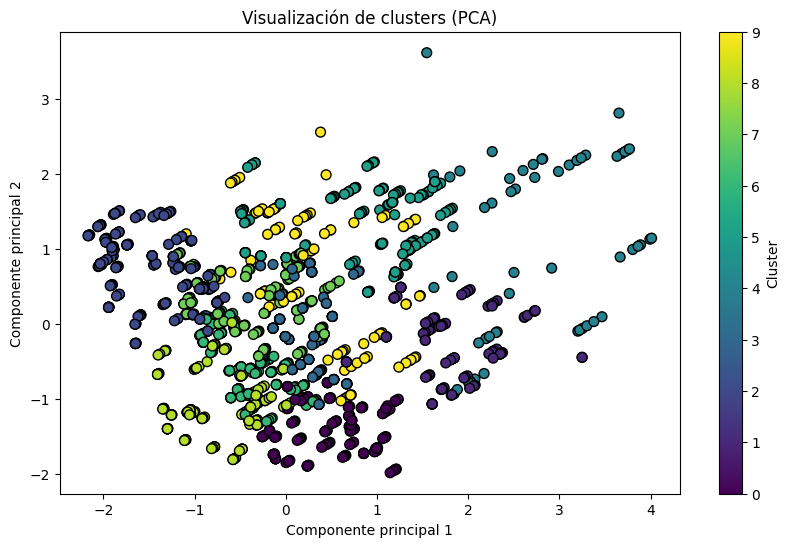

In [ ]:
# Visualización de clusters con PCA (ejemplo adicional)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('Visualización de clusters (PCA)')
plt.colorbar(label='Cluster')
plt.show()


#### 4.2.2.1 DBSCAN


DBSCAN es un algoritmo de clustering que no requiere que especifiques el número de clusters de antemano, y puede identificar regiones densas de puntos en el espacio de características.

DBSCAN con eps=0.1 y min_samples=5: Silhouette Score = 0.6344286466499087
DBSCAN con eps=0.1 y min_samples=10: Silhouette Score = -0.4059773037292435
DBSCAN con eps=0.5 y min_samples=5: Silhouette Score = 0.28226945156043826
DBSCAN con eps=0.5 y min_samples=10: Silhouette Score = 0.12987580072325516
DBSCAN con eps=0.5 y min_samples=15: Silhouette Score = 0.045729311698239634
DBSCAN con eps=1.0 y min_samples=5: Silhouette Score = -0.019906560515742404
DBSCAN con eps=1.0 y min_samples=10: Silhouette Score = 0.17709321202079378
DBSCAN con eps=1.0 y min_samples=15: Silhouette Score = 0.17709321202079378
Mejor configuración: eps=0.1, min_samples=5, Silhouette Score=0.6344286466499087


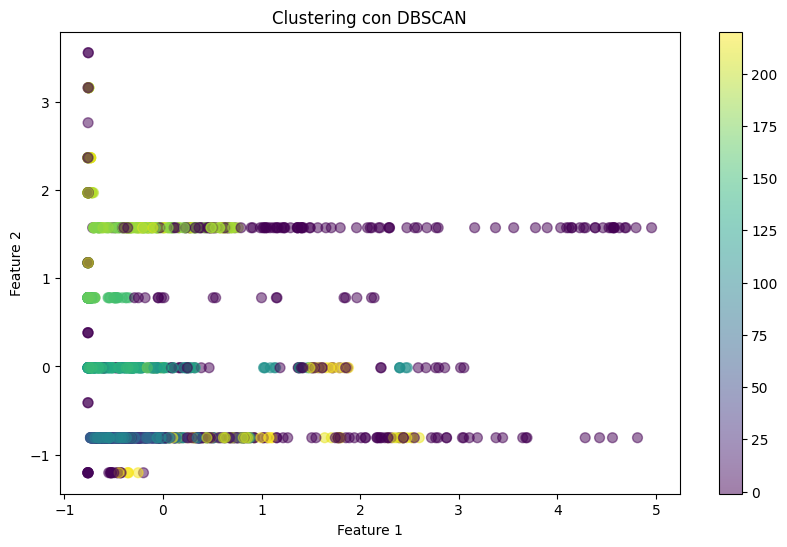

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Supongamos que X_scaled es tu matriz de características normalizadas

# Probar diferentes configuraciones de DBSCAN y evaluar el Silhouette Score
eps_values = [0.1, 0.5, 1.0]  # Valores de epsilon para probar
min_samples_values = [5, 10, 15]  # Valores de min_samples para probar
best_silhouette_score = -1
best_eps = None
best_min_samples = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(X_scaled)

        # Calcular el Silhouette Score (ignorando el ruido, es decir, las etiquetas -1)
        if len(set(cluster_labels)) > 1:  # Asegurarse de que haya al menos dos clusters identificados
            silhouette_avg = silhouette_score(X_scaled, cluster_labels)
            print(f"DBSCAN con eps={eps} y min_samples={min_samples}: Silhouette Score = {silhouette_avg}")

            # Actualizar el mejor Silhouette Score encontrado
            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_eps = eps
                best_min_samples = min_samples

print(f"Mejor configuración: eps={best_eps}, min_samples={best_min_samples}, Silhouette Score={best_silhouette_score}")

# Visualización opcional de los clusters resultantes
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
cluster_labels = dbscan.fit_predict(X_scaled)

# Visualización de los clusters encontrados
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)
plt.title('Clustering con DBSCAN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()


Mejor configuración: eps=0.1, min_samples=5, Silhouette Score=0.6351021013183907


###4.2.3 Random-Forest


In [ ]:
from sklearn.model_selection import train_test_split

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Inicializar el modelo RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Configurar la búsqueda de hiperparámetros usando GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Entrenar el modelo usando la búsqueda de hiperparámetros con los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros encontrados por la búsqueda
best_params = grid_search.best_params_
print(f"Mejores hiperparámetros encontrados: {best_params}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Mejores hiperparámetros encontrados: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# Utilizar el mejor modelo encontrado para hacer predicciones
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Calcular métricas de desempeño
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 188354539.12364262
R² Score: 0.8802905194798183


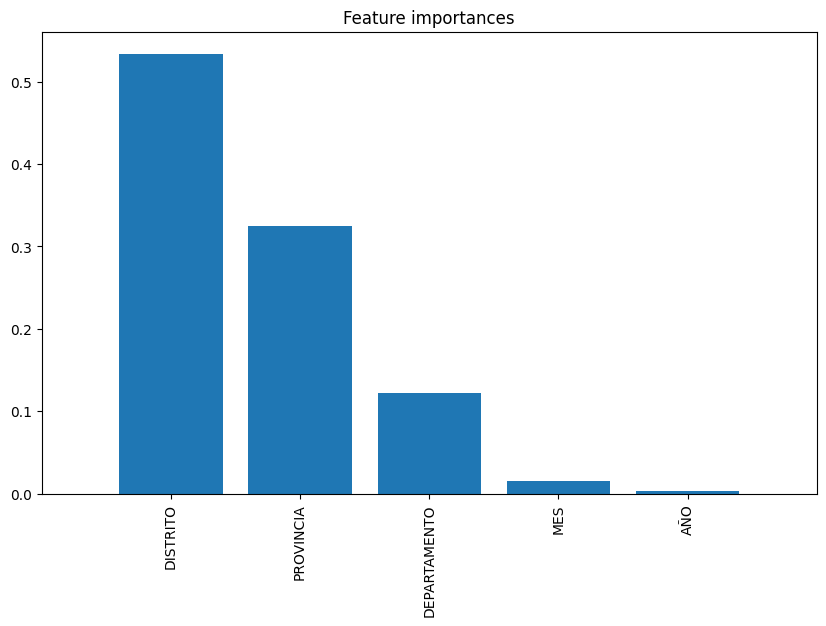

In [ ]:
importances = best_rf_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()